In [1]:
from pathlib import Path
from warnings import filterwarnings

import iris
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from jules_output_analysis.data import get_n96e_land_mask, regrid_to_n96e
from wildfires.configuration import DATA_DIR
from wildfires.utils import match_shape

filterwarnings("ignore", ".*divide by zero.*")
filterwarnings("ignore", ".*invalid units.*")
filterwarnings("ignore", ".*may not be fully.*")
filterwarnings("ignore", ".*axes.*")
filterwarnings("ignore")
mpl.rc_file("matplotlibrc")

In [4]:
cube_2d = regrid_to_n96e(iris.load_cube(str(Path(DATA_DIR) / "GFED4_climatology.nc")))
cube_2d.data.mask |= match_shape(
    ~get_n96e_land_mask(),
    cube_2d.shape,
)

In [13]:
from scipy.stats import lognorm

In [17]:
data = np.ma.getdata(cube_2d.data)[~np.ma.getmaskarray(cube_2d.data)]
params = lognorm.fit(data)
params

(4.238539278197181, -1.909426464218468e-13, 1.862602665556781e-09)

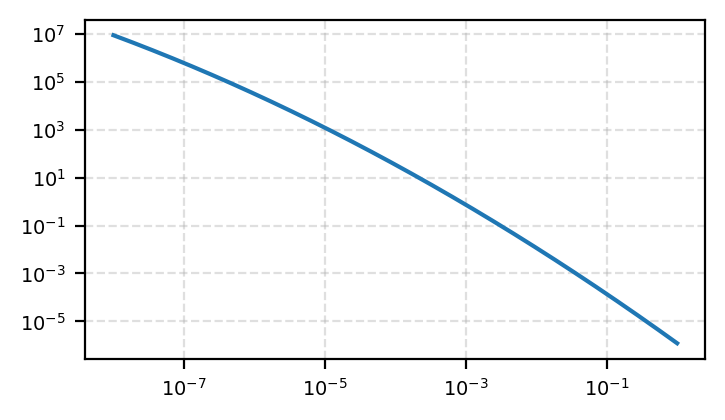

In [30]:
xs = np.geomspace(1e-8, 1, 1000000)
plt.plot(xs, lognorm.pdf(xs, *params))
plt.yscale("log")
plt.xscale("log")

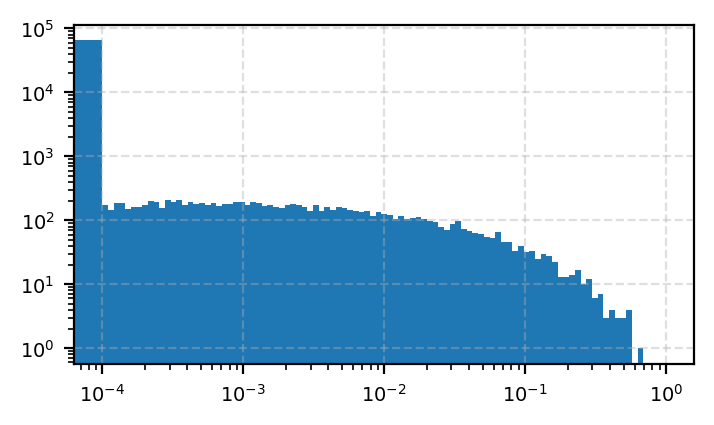

In [35]:
plt.hist(
    np.ma.getdata(cube_2d.data)[~np.ma.getmaskarray(cube_2d.data)],
    bins=np.append([0], np.geomspace(1e-4, 1, 100)),
)
plt.yscale("log")
plt.xscale("log")